In [2]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import random


In [3]:
euro = "data/Euro_6_CLEAN.csv"
euro_df = pd.read_csv(euro, encoding='ANSI')
euro_df

,Manufacturer,Model,Description,Transmission,Manual or Automatic,Engine Capacity,Fuel Type,Powertrain,Engine Power (PS),Engine Power (Kw),...,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Date of change,Cleaned CO2
0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,161.0
1,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,09-Feb-22,153.0
2,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,169.0
3,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,05-Oct-20,162.0
4,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,107.0,...,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,02-Jul-21,169.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6329,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6330,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0
6331,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,76.0
6332,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design Pro,8A-AWD,Automatic,1969.0,Electricity / Petrol,Plug-in Hybrid Electric Vehicle (PHEV),390.0,288.0,...,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,13-Aug-21,57.0


# How do manufacturers vary in their approach to emissions?

In [4]:
euro_emissions = euro_df.groupby(['Manufacturer', 'Model', 'Description'], as_index=False).mean()
euro_emissions

,Manufacturer,Model,Description,Engine Capacity,Engine Power (PS),Engine Power (Kw),Electric energy consumption Miles/kWh,wh/km,Maximum range (Km),Maximum range (Miles),...,Electric Range City Km,Emissions CO [mg/km],THC Emissions [mg/km],Emissions NOx [mg/km],THC + NOx Emissions [mg/km],Particulates [No.] [mg/km],RDE NOx Urban,RDE NOx Combined,Noise Level dB(A),Cleaned CO2
0,ABARTH,595,1.4 TJET 145bhp,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,829.0,39.0,20.0,59.0,NaN,NaN,NaN,74.0,157.0
1,ABARTH,595,595 1.4 145 BHP,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,162.0
2,ABARTH,595,595 1.4 145 BHP,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,169.0
3,ABARTH,595,595 1.4 145 BHP Convertible,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,165.5
4,ABARTH,595,595 1.4 TJET 145 BHP,1368.0,145.0,107.0,0.0,NaN,NaN,NaN,...,NaN,760.0,52.0,27.0,79.0,NaN,NaN,NaN,73.5,162.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,66.5
3721,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Expression,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,66.5
3722,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid Inscription Pro,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,66.5
3723,VOLVO,"XC90, MY22",Recharge T8 Plug-in Hybrid R-Design,1969.0,390.0,288.0,2.4,254.0,50.0,31.0,...,51.0,706.0,6.0,9.0,14.0,0.22,NaN,NaN,67.0,66.5


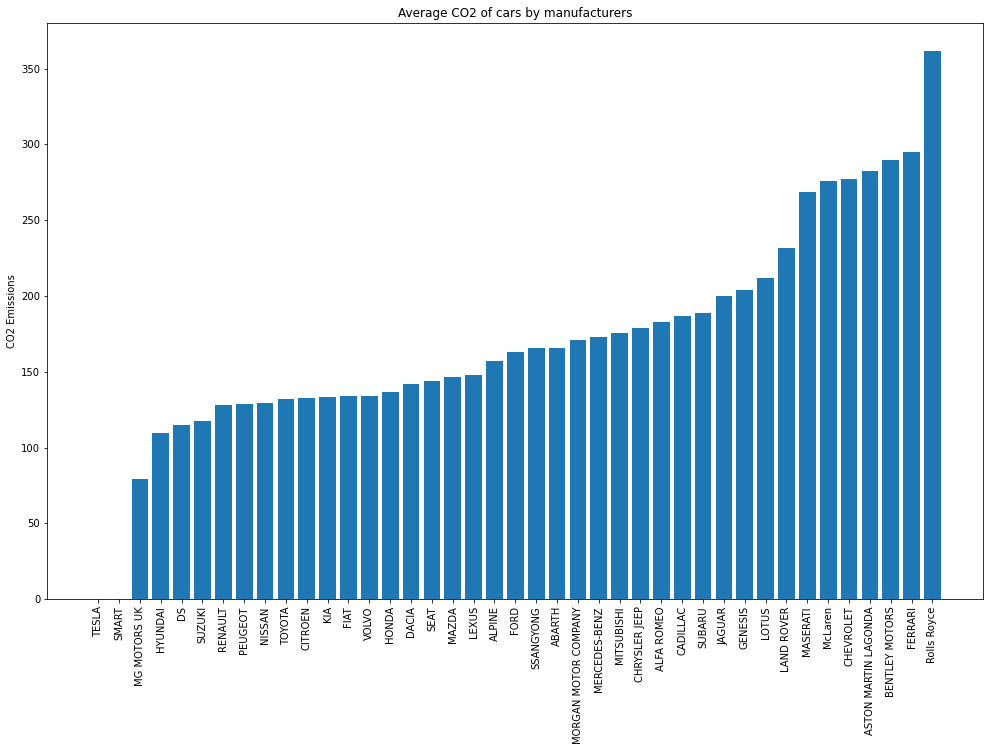

In [24]:
emissions_superstars_pooperstars= manu_emissions["Manufacturer"]
cars = []
euro_emissions_crop = euro_emissions[['Manufacturer', 'Model', 'Description', 'Cleaned CO2']]

for manufacturer in emissions_superstars_pooperstars:
    carDF = euro_emissions_crop.loc[((euro_emissions_crop["Manufacturer"] == manufacturer ))]
    carDF.sort_values(by="Cleaned CO2", ascending=True)
    cars.append(carDF) 

cars

[     Manufacturer    Model                     Description  Cleaned CO2
 3279        TESLA  Model 3           Long Range (E3CD#Gb1)          0.0
 3280        TESLA  Model 3           Long Range (E3LD#Gb1)          0.0
 3281        TESLA  Model 3            Long Range (E5D##b1)          0.0
 3282        TESLA  Model 3           Performance (E3LD##p)          0.0
 3283        TESLA  Model 3            Performance (E5D#Gp)          0.0
 3284        TESLA  Model 3  Standard Range Plus (E1CR#Gb1)          0.0
 3285        TESLA  Model 3  Standard Range Plus (E1LR#Gb1)          0.0
 3286        TESLA  Model 3   Standard Range Plus (E6R#Gb1)          0.0
 3287        TESLA  Model S              Long Range (SA3EB)          0.0
 3288        TESLA  Model S             Performance (SA3EP)          0.0
 3289        TESLA  Model X              Long Range (XA3EB)          0.0
 3290        TESLA  Model X             Performance (XA3EP)          0.0,
      Manufacturer                            Mode

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
#treatments = [capomulin, ramicane, infubinol, ceftamin]


# Create empty list to fill with emissions data (for plotting)
outliers = []
quartile_sum = pd.DataFrame({})
# Calculate the IQR and quantitatively determine if there are any potential outliers. 


for brand in cars:
    #instantiate q0->5
    quartiles = brand["Cleaned CO2"].quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    median = quartiles[0.5]    
    upperq = quartiles[0.75]
    lowest = brand["Cleaned CO2"].min()
    highest = brand["Cleaned CO2"].max()
    
    iqr = upperq-lowerq
    
    #outlier check
    #HANG ON surely this can be done simpler with booleans
    x = brand.loc[brand["Cleaned CO2"] < (lowerq - iqr*1.5)]
    if len(x) > 0:
        outliers.append(x["Description"])
        
    x = brand.loc[brand["Cleaned CO2"] > (upperq + iqr*1.5)]
    if len(x) >0:
        outliers.append(x["Description"])
        
#investigate a better way to do this...
    cardict = {"brand": brand["Manufacturer"], 
                "Q0": round(lowest, 1), 
                "Q1": round(lowerq, 1), 
                "Q2": round(median, 1), 
                "Q3": round(upperq, 1), 
                "Q4": round(highest, 1)}   
    quartile_sum = quartile_sum.append(cardict, ignore_index=True)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Determine outliers using upper and lower bounds
print(f"there are {len(outliers)} outliers in the data: {outliers}")
    # add subset 
    
# # format nicely    
quartile_sum = quartile_sum.transpose()
# quartile_sum.columns = quartile_sum.iloc[0] 
# quartile_sum = quartile_sum[1:]
quartile_sum



there are 33 outliers in the data: [698             Electric Premium & Premium SE
701                                   Premium
702                               Premium AWD
703                                SE Connect
704                                  Ultimate
705                              Ultimate AWD
709    Electric 39kWh battery - 21MY Facelift
710     Electric 64kWh battery 21MY Facelift 
715                        Premium & Ultimate
723                        Premium & Ultimate
Name: Description, dtype: object, 713                    Kona N
738    Fastback N Performance
744             N Performance
Name: Description, dtype: object, 400    E-TENSE
Name: Description, dtype: object, 3249    ACROSS 2.5 PHEV SZ5 ALLGRIP CVT
Name: Description, dtype: object, 2646       E-TECH Launch Edition Plug-in Hybrid 160 Auto
2686     R.S. Line E-TECH Plug-in Hybrid 160 Auto MY21.5
2696            S Edition E-TECH Plug-in Hybrid 160 Auto
2697     S Edition E-TECH Plug-in Hybrid 160 Auto MY

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
brand,3279 TESLA 3280 TESLA 3281 TESLA 3282...,3199 SMART 3200 SMART 3201 SMART 3202...,2474 MG MOTORS UK 2475 MG MOTORS UK 2476...,695 HYUNDAI 696 HYUNDAI 697 HYUNDAI 6...,399 DS 400 DS 401 DS 402 DS 403 ...,3249 SUZUKI 3250 SUZUKI 3251 SUZUKI 3...,2634 RENAULT 2635 RENAULT 2636 RENAUL...,2565 PEUGEOT 2566 PEUGEOT 2567 PEUGEO...,2516 NISSAN 2517 NISSAN 2518 NISSAN 2...,3291 TOYOTA 3292 TOYOTA 3293 TOYOTA 3...,...,612 GENESIS 613 GENESIS 614 GENESIS 6...,1556 LOTUS 1557 LOTUS 1558 LOTUS 1559...,1313 LAND ROVER 1314 LAND ROVER 1315 ...,1564 MASERATI 1565 MASERATI 1566 MASE...,2506 McLaren 2507 McLaren 2508 McLare...,130 CHEVROLET 131 CHEVROLET Name: Manufa...,89 ASTON MARTIN LAGONDA 90 ASTON MARTI...,110 BENTLEY MOTORS 111 BENTLEY MOTORS 11...,415 FERRARI 416 FERRARI 417 FERRARI 4...,3004 Rolls Royce 3005 Rolls Royce 3006 ...
Q0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,22.0,...,166.0,173.0,35.0,206.0,270.0,277.0,244.0,82.0,154.0,353.0
Q1,0.0,0.0,0.0,114.0,99.5,112.0,119.6,125.5,135.0,112.0,...,186.0,177.0,208.0,245.0,276.0,277.0,263.0,281.0,270.8,353.5
Q2,0.0,0.0,43.0,122.0,140.0,121.0,134.1,139.0,142.0,119.0,...,200.0,230.0,243.0,270.0,276.0,277.0,276.0,288.0,293.0,362.0
Q3,0.0,0.0,152.2,138.9,153.0,128.0,147.0,154.5,145.0,132.0,...,226.0,230.0,260.5,301.0,276.8,277.0,306.0,320.0,366.0,367.8
Q4,0.0,0.0,174.0,194.0,160.5,142.0,203.0,195.5,175.0,258.0,...,244.0,246.5,339.0,345.0,280.0,277.0,323.0,340.0,373.0,376.5


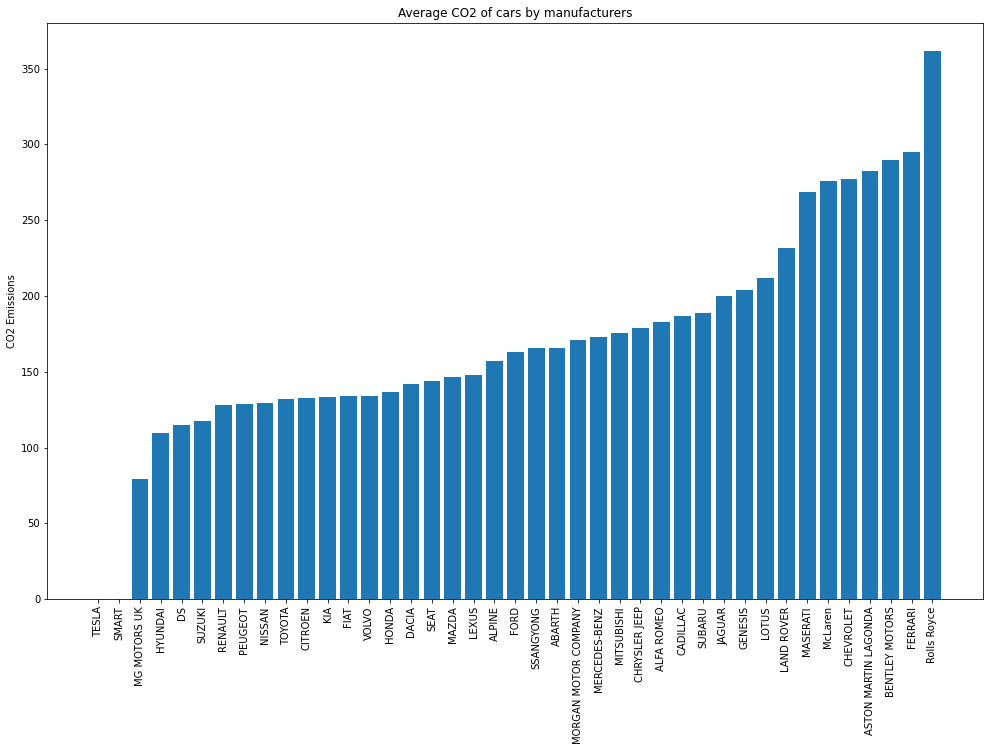

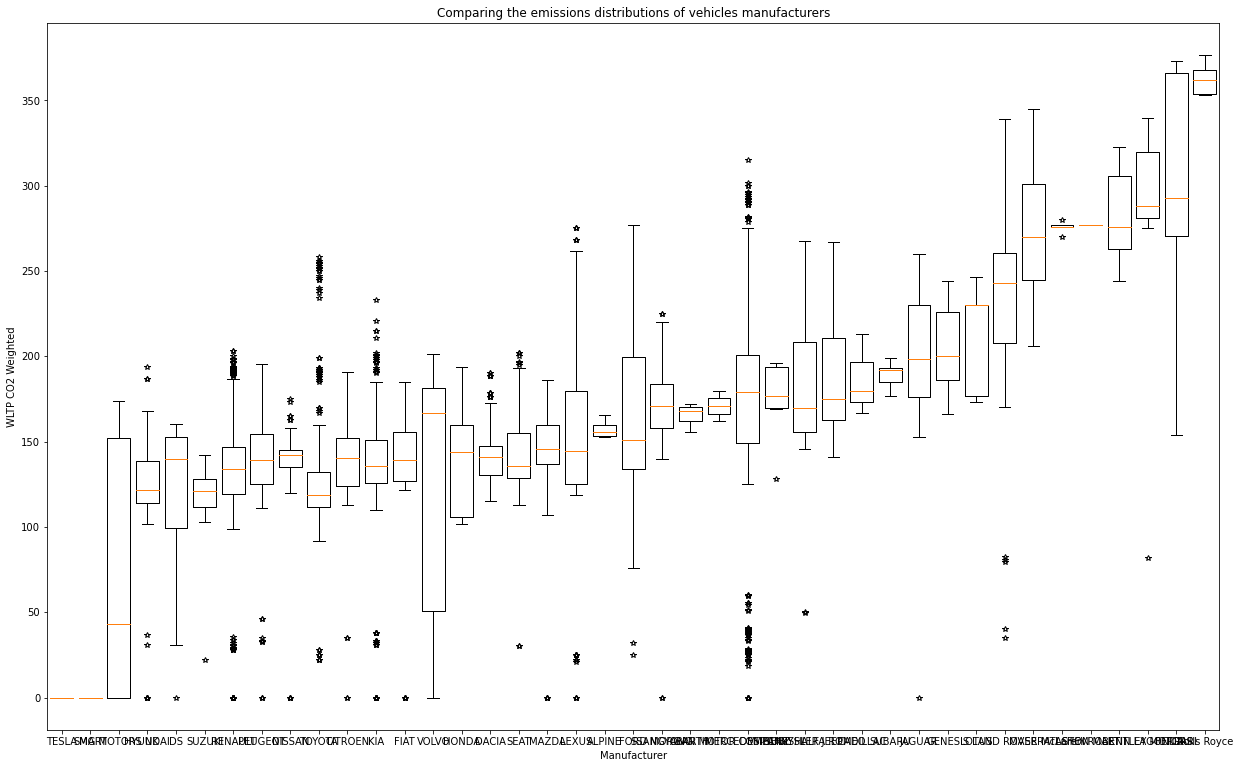

In [34]:
# Generate a box plot for each car manufacturer, of the CO2 emissions of their various vehicles.

    
data = []

for car in cars:
    data.append(car["Cleaned CO2"])

manu_emissions = euro_emissions.groupby(['Manufacturer'], as_index=False).mean().sort_values(by='Cleaned CO2')
manu_emissions = manu_emissions[['Manufacturer', 'Cleaned CO2']]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(manu_emissions["Manufacturer"],manu_emissions["Cleaned CO2"])
ax.set_ylabel('CO2 Emissions')
ax.set_title('Average CO2 of cars by manufacturers')
plt.xticks(manu_emissions["Manufacturer"], rotation='vertical')
a
fig.set_figheight(8)
fig.set_figwidth(13)

fig, ax = plt.subplots()
ax.set_title('Comparing the emissions distributions of vehicles manufacturers')
ax.boxplot(data, labels = emissions_superstars_pooperstars, sym="*", widths=(0.8))

plt.xlabel("Manufacturer")
plt.ylabel("WLTP CO2 Weighted")


fig.set_figheight(13)
fig.set_figwidth(21)